<a href="https://colab.research.google.com/github/TayyabTahir71/shoutout/blob/main/1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d imrankhan77/nct-crc-he-100k

100% 11.2G/11.2G [08:59<00:00, 23.0MB/s]
100% 11.2G/11.2G [08:59<00:00, 22.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nct-crc-he-100k.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os, warnings, cv2
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import tensorflow as tf
import pandas as pd

from os import listdir
from os.path import isfile, join
from shutil import rmtree

from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [ ]:
main_path = '/content/NCT-CRC-HE-100K'
sub_dir =os.listdir(main_path)

In [ ]:
Data_df=pd.DataFrame({'ID': [], 'Class':[]})

for subdir in sub_dir:
    mypath = join(main_path,subdir)
    files=[f for f in listdir(mypath)]
    classes=[subdir for c in files]
    files_df = pd.DataFrame({'ID':files, 'Class':classes})
    Data_df = Data_df.append(files_df)

Data_df

,ID,Class
0,NORM-SNQSGKWH.tif,NORM
1,NORM-LDMWCSPC.tif,NORM
2,NORM-KCDSNDIE.tif,NORM
3,NORM-VPHWDSMY.tif,NORM
4,NORM-SAQPRDTN.tif,NORM
...,...,...
10561,BACK-KMPCLITE.tif,BACK
10562,BACK-CDVVVGCT.tif,BACK
10563,BACK-HATADLYF.tif,BACK
10564,BACK-AYLQHMDN.tif,BACK


Distribution of classes is as followed:
NORM     8763
MUC      8896
ADI     10407
STR     10446
BACK    10566
DEB     11512
LYM     11557
MUS     13536
TUM     14317
Name: Class, dtype: int64 
 


 
 
 



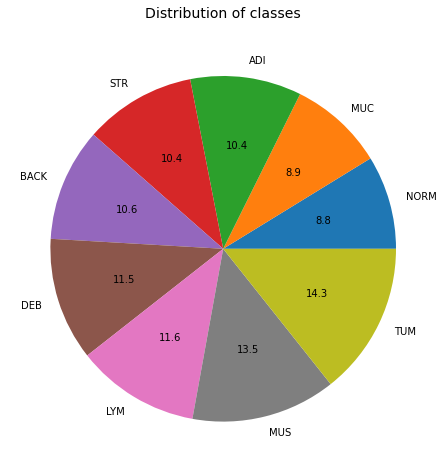

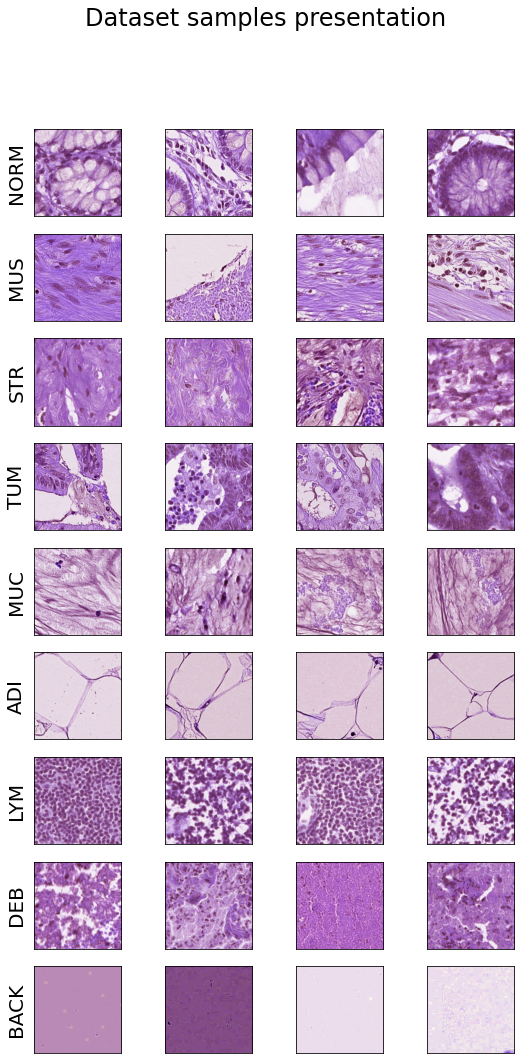

In [ ]:
class_of_patch = Data_df.Class.value_counts()
print('Distribution of classes is as followed:\n{}'.format(class_of_patch[::-1]),'\n','\n')

pie_fig = plt.figure(figsize=(6,7))
pie_axis = pie_fig.add_axes([0,0,1,1])
pie_axis.pie(class_of_patch[::-1],labels=['NORM','MUC','ADI','STR','BACK','DEB','LYM','MUS','TUM'],startangle=0,autopct='%1.1f')
pie_fig.suptitle('Distribution of classes',size=14)



# Display some random samples from dataset
samp_fig, axis = plt.subplots(9,4,figsize=(9,17))
samp_fig.suptitle('Dataset samples presentation',size=24)

print('\n','\n','\n','\n')
for subdir in sub_dir:
    samples = Data_df.loc[Data_df['Class']==subdir].sample(4)
    imgs = []
    for sample in samples['ID']:
        path = join(main_path,subdir,sample)
        img = cv2.imread(path)
        imgs.append(img)
    
    
    for i , img in enumerate(imgs):
        axis[sub_dir.index(subdir),i].set_xticks([])
        axis[sub_dir.index(subdir),i].set_yticks([])
        axis[sub_dir.index(subdir),i].imshow(img)
        axis[sub_dir.index(subdir),0].set_ylabel('{}'.format(subdir),size=20)

In [ ]:
y_1 = Data_df['Class']

train_test_df, val_df = train_test_split(Data_df,train_size = 0.85,random_state=101,shuffle=True,stratify=y_1 ) 

y_2 = train_test_df['Class']

train_df, test_df = train_test_split(train_test_df,train_size=0.823529,random_state=101,shuffle=True,stratify=y_2)

Class Distribution of Training Examples:
TUM     10021
MUS      9475
LYM      8090
DEB      8058
BACK     7396
STR      7312
ADI      7285
MUC      6228
NORM     6134
Name: Class, dtype: int64 
 
 
 

Class Distribution of Validation Examples:
TUM     2148
MUS     2030
LYM     1734
DEB     1727
BACK    1585
STR     1567
ADI     1561
MUC     1334
NORM    1314
Name: Class, dtype: int64 
 
 
 

Class Distribution of Test Examples:
TUM     2148
MUS     2031
LYM     1733
DEB     1727
BACK    1585
STR     1567
ADI     1561
MUC     1334
NORM    1315
Name: Class, dtype: int64 
 
 
 



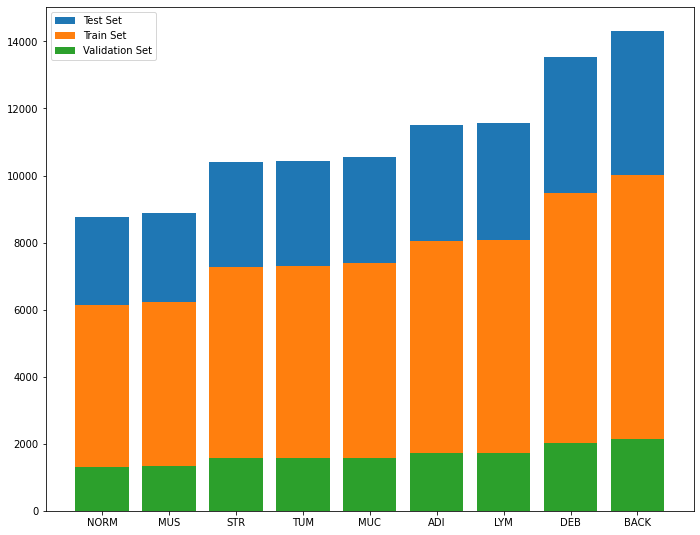

In [ ]:
class_of_train_patch = train_df.Class.value_counts()
class_of_val_patch = val_df.Class.value_counts()
class_of_test_patch = test_df.Class.value_counts()

print('Class Distribution of Training Examples:\n{}'.format(class_of_train_patch),'\n','\n','\n','\n')
print('Class Distribution of Validation Examples:\n{}'.format(class_of_val_patch),'\n','\n','\n','\n')
print('Class Distribution of Test Examples:\n{}'.format(class_of_test_patch),'\n','\n','\n','\n')

#Bar plot for checking the distribution

bar_fig = plt.figure(figsize=(9,7))
bar_axis = bar_fig.add_axes([0,0,1,1])

bar_axis.bar(sub_dir,class_of_patch[::-1],label= 'Test Set')
bar_axis.bar(sub_dir,class_of_train_patch[::-1], label = 'Train Set')
bar_axis.bar(sub_dir,class_of_val_patch[::-1], label = 'Validation Set')


bar_axis.legend()

In [ ]:
main_dir = 'SplittedData'
os.mkdir(main_dir)

train_dir = join(main_dir,'Training')
os.mkdir(train_dir)

val_dir = join(main_dir,'Validation')
os.mkdir(val_dir)

test_dir = join(main_dir,'Test')
os.mkdir(test_dir)


for subdir in range(len(sub_dir)):
    train_sub_dir = join(train_dir,sub_dir[subdir])
    os.mkdir(train_sub_dir)
    
    val_sub_dir = join(val_dir,sub_dir[subdir])
    os.mkdir(val_sub_dir)
    
    test_sub_dir = join(test_dir,sub_dir[subdir])
    os.mkdir(test_sub_dir)

In [ ]:
Data_df.set_index('ID', inplace=True)

for img in train_df['ID']:
    label = Data_df.loc[img,'Class']
    source = join(main_path,label,img)
    dest = join(train_dir,label,img)
    
    cv2_img = cv2.imread(source)
    cv2.imwrite(dest,cv2_img)

    
for img in val_df['ID']:
    label = Data_df.loc[img,'Class']
    source = join(main_path,label,img)
    dest = join(val_dir,label,img)
    
    cv2_img = cv2.imread(source)
    cv2.imwrite(dest,cv2_img)

    
for img in test_df['ID']:
    label = Data_df.loc[img,'Class']
    source = join(main_path,label,img)
    dest = join(test_dir,label,img)
    
    cv2_img = cv2.imread(source)
    cv2.imwrite(dest,cv2_img)

In [ ]:
img_size = 224
img_channel=3
input_shape=(img_size,img_size,img_channel)
BATCH_size =120
learning_rate = 3E-4
train_step = (len(train_df)/BATCH_size)
val_step = (len(val_df)/BATCH_size)

datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, vertical_flip = True)

train_ds= datagen.flow_from_directory(train_dir,
                                     target_size=(img_size,img_size),
                                     batch_size=BATCH_size,
                                     shuffle = True,
                                     seed = 101,
                                     interpolation = 'nearest',
                                     class_mode='categorical')
val_ds = datagen.flow_from_directory(val_dir,
                                     target_size=(img_size,img_size),
                                     batch_size=BATCH_size,
                                     shuffle = False,
                                     interpolation = 'nearest',
                                     class_mode='categorical')

test_ds = datagen.flow_from_directory(test_dir,
                                     target_size=(img_size,img_size),
                                     batch_size=BATCH_size,
                                     shuffle = False,
                                     interpolation = 'nearest',
                                     class_mode='categorical')

print(train_ds.class_indices)

Found 69999 images belonging to 9 classes.
Found 15000 images belonging to 9 classes.
Found 15001 images belonging to 9 classes.
{'ADI': 0, 'BACK': 1, 'DEB': 2, 'LYM': 3, 'MUC': 4, 'MUS': 5, 'NORM': 6, 'STR': 7, 'TUM': 8}


In [ ]:
saved_model_path = 'modelinception.h5'
checkpoint = ModelCheckpoint(saved_model_path, monitor='val_loss', verbose=1, save_best_only=True,
                             mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, 
                                   verbose=1, mode='max',min_delta=0.001, min_lr=0.0000001)

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 23,236,937
Trainable params: 3,212,553
Non-trainable params: 20,024,384
_________________________________________________________________
None
Epoch 1/15
584/583 [==============================] - ETA: 0s - loss: 0.4283 - accuracy: 0.8584
Ep

<AxesSubplot:>

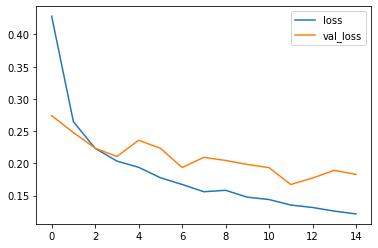

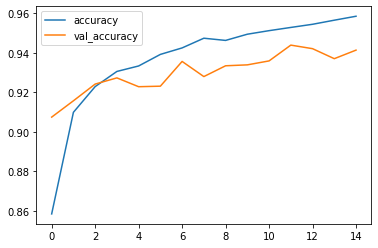

In [ ]:
Base_model = VGG19(include_top=False , input_shape=(224,224,3), classifier_activation = 'softmax', weights = 'imagenet')
Base_model.trainable = False

model = keras.Sequential([
        Base_model,
        Flatten(),
        Dense(128, activation = 'relu'),
        Dense(9, activation='softmax')
    ])
    
model.compile(
    optimizer=keras.optimizers.Adam(epsilon = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])
print(model.summary())


history = model.fit(
    train_ds,
    steps_per_epoch= train_step,
    shuffle = True,
    validation_data = val_ds,
    validation_steps = val_step,
    verbose = 1,
    epochs = 15,
    callbacks = [checkpoint])


hist_df = pd.DataFrame(history.history)
hist_df.loc[:,['loss','val_loss']].plot()
hist_df.loc[:,['accuracy','val_accuracy']].plot()

In [1]:
model.load_weights('modelinception.h5')

Base_model.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001, epsilon = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

history = model.fit(
    train_ds,
    steps_per_epoch= train_step,
    shuffle = True,
    validation_data = val_ds,
    validation_steps = val_step,
    verbose = 1,
    epochs = 8,
    callbacks=[checkpoint,reduce_lr])

# serialize model to JSON
model_json = model.to_json()
with open("CRC_modelinception.json", "w") as json_file:             
     json_file.write(model_json) 

# serialize weights to HDF5
model.save_weights("CRC_modelinception.h5")
print("Saved model to disk")

NameError: ignored